# Importanto Base Kaggle

In [119]:
import os
import shutil

# Criar pasta .kaggle
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Mover o arquivo para o local correto
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Garantir permissões corretas
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [120]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [121]:
import zipfile

with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("titanic-data")

# Analise

🚢 Lista de Exercícios – Titanic Dataset (Kaggle)
🔹 Parte 1: Compreensão e Exploração Inicial

    Carregue o dataset Titanic.

    Exiba as primeiras 10 linhas da tabela.

    Quantas linhas e colunas há no dataset?

    Liste os tipos de dados de cada coluna.

    Verifique se há valores nulos no dataset.

    Qual a proporção de sobreviventes e não sobreviventes?

    Qual a média e a mediana das idades dos passageiros?

    Crie um gráfico de barras com a contagem de passageiros por classe (Pclass).

🔹 Parte 2: Análise Exploratória (EDA)

    Existe relação entre sexo e sobrevivência? Crie um gráfico.

    Qual a taxa de sobrevivência por classe (Pclass)?

    Qual a idade média dos sobreviventes versus não sobreviventes?

    Crie um histograma das idades dos passageiros.

    Analise o número de passageiros por porto de embarque (Embarked).

    Existe relação entre número de familiares a bordo (SibSp + Parch) e a sobrevivência?

    Crie um boxplot da idade por classe (Pclass).

🔹 Parte 3: Pré-processamento e Feature Engineering

    Preencha os valores nulos da coluna Age.

    Crie uma nova coluna chamada FamilySize = SibSp + Parch + 1.

    Transforme a coluna Sex em variável numérica.

    Aplique one-hot encoding para a coluna Embarked.

    Remova colunas irrelevantes como Cabin, Ticket e Name.

🔹 Parte 4: Modelagem (Básico)

    Separe os dados em conjuntos de treino e teste.

    Treine um modelo simples de regressão logística.

    Avalie a acurácia do modelo.

    Verifique a importância das features utilizadas.

    Teste diferentes combinações de features e compare os resultados.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

In [123]:
# Carregue o dataset
df_train = pd.read_csv("titanic-data/train.csv")

In [124]:
# Exiba as primeiras 10 linhas da tabela
print(df_train.head(10))

   PassengerId  Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
5            6         0       3                                

In [125]:
# Quantas linhas e colunas há no dataset?
print(df_train.shape)

(891, 12)


In [126]:
# Liste o tipo de dado de cada coluna
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [127]:
# Verifique se há valores nulos. Quantos são por coluna?
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [128]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [129]:
# Qual a proporção de sobreviventes e não sobreviventes?
sobreviventes = (df_train['Survived'] == 1).sum()
total = (df_train['Survived']).count()
percentage = sobreviventes/total

print(f"{percentage:.2%}")

38.38%


In [130]:
# Qual a média de idade dos passageiros? E a mediana?
media = round((df_train['Age']).mean(),2)
mediana = (df_train['Age']).median()
print(f"{media}")
print(f"{mediana}")


29.7
28.0


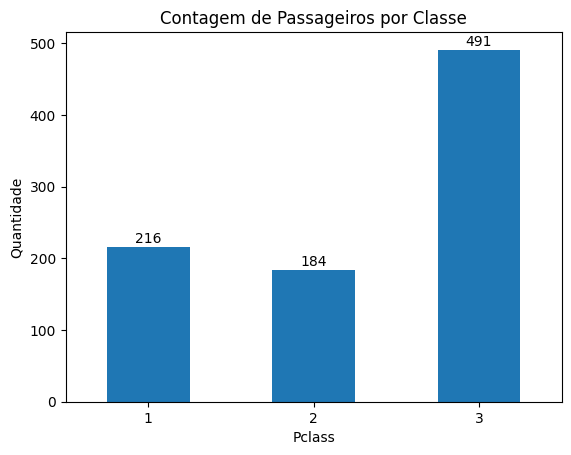

In [144]:
# Crie um gráfico de barras com a contagem de passageiros por classe

contagem = df_train['Pclass'].value_counts().sort_index()
graf = contagem.plot(kind='bar')
plt.title(f'Contagem de Passageiros por Classe')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')

for i, valor in enumerate(contagem):
    graf.text(i, valor + 5, str(valor), ha='center')

plt.show()